<a href="https://colab.research.google.com/github/jpmarques-97/MachineLearning_study/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import stdev 
from statistics import mean
from matplotlib import style

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Coursera/Week3_data"

ex2data1.txt  ex2data2.txt  ex2.pdf


In [0]:
data = pd.read_csv('/content/drive/My Drive/Coursera/Week3_data/ex2data1.txt', header = None)
data.insert(0,'bias',np.ones((len(data),1)))

data.head()

,bias,0,1,2
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [0]:
data.rename(columns={0:'x1', 1:'x2', 2:'label'},inplace=True)
data.head()

,bias,x1,x2,label
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [0]:
df1 = data.query('label==0')

df2 = data.query('label==1')

In [0]:
x = np.array([data['bias'],data['x1'],data['x2']])

a,b = x.shape
y = np.array(data['label']).reshape(b,1)

x_1 = np.array([df1['bias'],df1['x1'],df1['x2']])
a,b = x_1.shape
y_1 = np.array(df1['label']).reshape(b,1)

x_2 = np.array([df2['bias'],df2['x1'],df2['x2']])
a,b = x_2.shape
y_2 = np.array(df2['label']).reshape(b,1)

theta = np.zeros((3,1)).reshape(3,1)


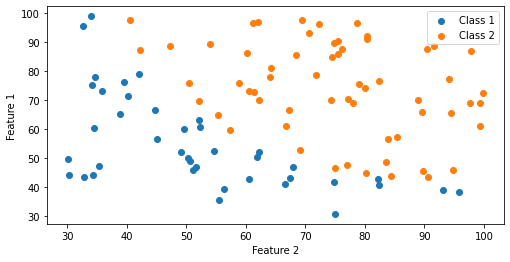

In [0]:

f = plt.figure(figsize=(18,4))
ax = f.add_subplot(121)
ax.scatter(x_1[1],x_1[2])
ax.scatter(x_2[1],x_2[2])

plt.ylabel('Feature 1');
plt.xlabel('Feature 2');
ax.legend(['Class 1', 'Class 2'])
f.show()

In [0]:
def sigmoid(z):
  return .5 * (1 + np.tanh(.5 * z))

In [0]:
def h(theta,x):
  theta = np.transpose(theta)
  x = x.reshape(3,1)
  predict = np.matmul(theta,x)
  return sigmoid(predict)

In [0]:
def cost(theta,x,y):
  custo = np.sum(-(np.log(0.00001+sigmoid(np.matmul(theta.T,x)))*y.T)-((1-y.T)*np.log(1.00001-sigmoid(np.matmul(theta.T,x)))))
  return custo/len(x[0])

In [0]:
cost(theta,x,y)

6.561972016867593

In [0]:
def gradientDescent(theta,x,y,itherations):
  x = x.T
  for i in range(itherations):
    for i,item in enumerate(theta):
      delta = 0
      a = (sigmoid(np.matmul(theta.T,x.T))-y.T)
      b = (x.T[2-i].reshape(1,100))

      theta[2-i] -= (np.sum(a*b)/len(x))


  return theta

In [0]:
theta = np.zeros((3,1)).reshape(3,1)

In [0]:
theta = gradientDescent(theta,x,y,2000)

theta

array([[-162.42900827],
       [  10.2405392 ],
       [ -12.73470618]])